In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
mlp_valid_df = pd.read_csv('../03_Data_for_Modeling/val_mlp_new_time_window.csv')
mlp_y_valid = mlp_valid_df['time_window']

xg_valid_df = pd.read_csv('../03_Data_for_Modeling/val_xgboost.csv')
xg_y_valid = xg_valid_df['time_window']

equal = mlp_y_valid.equals(xg_y_valid)
print("Are the Series equal?:", equal)

Are the Series equal?: True


In [27]:
mlp_test_df = pd.read_csv('../03_Data_for_Modeling/test_mlp_new_time_window.csv')
mlp_y_test = mlp_test_df['time_window']

xg_test_df = pd.read_csv('../03_Data_for_Modeling/test_xgboost.csv')
xg_y_test = xg_test_df['time_window']

equal = mlp_y_test.equals(xg_y_test)
print("Are the Series equal?:", equal)

Are the Series equal?: True


### ^ confirms that the MLP and XGBoost datasets are in the same order which is critical

In [23]:
y_valid_df = pd.read_csv('../03_Data_for_Modeling/val_mlp_new_time_window.csv')
y_val = y_valid_df['time_window']

In [26]:
y_test_df = pd.read_csv('../03_Data_for_Modeling/test_mlp_new_time_window.csv')
y_test = y_test_df['time_window']

In [37]:
xgboost_yes4neigh_val_pred_prob = pd.read_csv('../03_Data_for_Modeling/val_xgboost_yes4neigh_ensemble_probabilities.csv')
xgboost_no4neigh_val_pred_prob = pd.read_csv('../03_Data_for_Modeling/val_xgboost_no4neigh_ensemble_probabilities.csv')
mlp_val_pred_prob = pd.read_csv('../03_Data_for_Modeling/val_mlp_ensemble_probabilities.csv')

xgboost_yes4neigh_test_pred_prob = pd.read_csv('../03_Data_for_Modeling/test_xgboost_yes4neigh_ensemble_probabilities.csv')
xgboost_no4neigh_test_pred_prob = pd.read_csv('../03_Data_for_Modeling/test_xgboost_no4neigh_ensemble_probabilities.csv')
mlp_test_pred_prob = pd.read_csv('../03_Data_for_Modeling/test_mlp_ensemble_probabilities.csv')

In [38]:
mlp_val_pred_prob.columns = [col + '_mlp_prob' for col in mlp_val_pred_prob.columns]
mlp_test_pred_prob.columns = [col + '_mlp_prob' for col in mlp_test_pred_prob.columns]

In [39]:
new_column_names = [
    'rush_morning_xgyes4neigh_prob',
    'rush_evening_xgyes4neigh_prob',
    'non_rush_day_xgyes4neigh_prob',
    'non_rush_night_xgyes4neigh_prob'
]

xgboost_yes4neigh_val_pred_prob.columns = new_column_names

xgboost_yes4neigh_test_pred_prob.columns = new_column_names

In [40]:
new_column_names = [
    'rush_morning_xgno4neigh_prob',
    'rush_evening_xgno4neigh_prob',
    'non_rush_day_xgno4neigh_prob',
    'non_rush_night_xgno4neigh_prob'
]

xgboost_no4neigh_val_pred_prob.columns = new_column_names

xgboost_no4neigh_test_pred_prob.columns = new_column_names

In [41]:
ensemble_val_features = pd.concat([mlp_val_pred_prob, xgboost_yes4neigh_val_pred_prob, xgboost_no4neigh_val_pred_prob], axis=1)
ensemble_test_features = pd.concat([mlp_test_pred_prob, xgboost_yes4neigh_test_pred_prob, xgboost_no4neigh_test_pred_prob], axis=1)

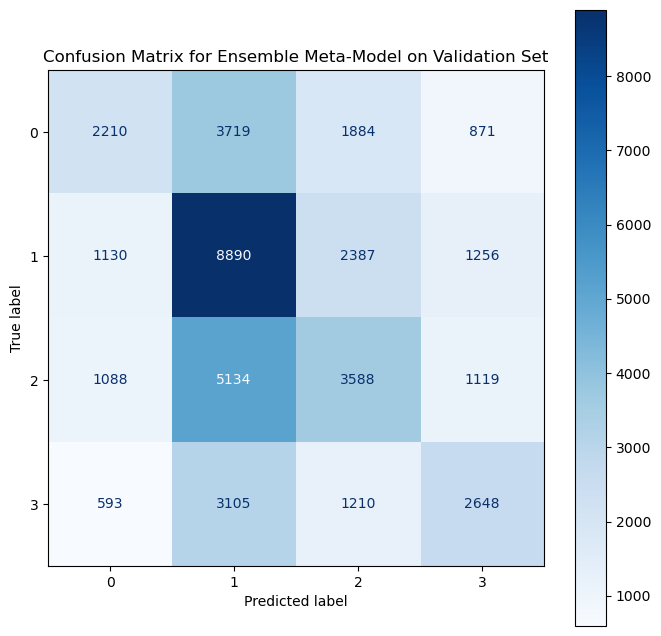

Validation Set Class-wise Metrics:
rush_morning - Precision: 0.44, Recall: 0.25, F1-Score: 0.32
rush_evening - Precision: 0.43, Recall: 0.65, F1-Score: 0.52
non_rush_day - Precision: 0.40, Recall: 0.33, F1-Score: 0.36
non_rush_night - Precision: 0.45, Recall: 0.35, F1-Score: 0.39

Macro Averages:
Precision: 0.43, Recall: 0.40, F1-Score: 0.40

Micro Averages:
Precision: 0.42, Recall: 0.42, F1-Score: 0.42


In [43]:
meta_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)

# Train the model
meta_model.fit(ensemble_val_features, y_val)

# Optionally, evaluate the model
y_val_pred = meta_model.predict(ensemble_val_features)
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_val))
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Ensemble Meta-Model on Validation Set')
plt.show()
class_names = ['rush_morning', 'rush_evening', 'non_rush_day', 'non_rush_night']

# Class-wise precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_val_pred, average=None)

print("Validation Set Class-wise Metrics:")
for i, class_name in enumerate(class_names):
    print(f"{class_name} - Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}, F1-Score: {f1_score[i]:.2f}")

# Macro and Micro Averages
precision_macro, recall_macro, f1_score_macro, _ = precision_recall_fscore_support(y_val, y_val_pred, average='macro')
precision_micro, recall_micro, f1_score_micro, _ = precision_recall_fscore_support(y_val, y_val_pred, average='micro')

print("\nMacro Averages:")
print(f"Precision: {precision_macro:.2f}, Recall: {recall_macro:.2f}, F1-Score: {f1_score_macro:.2f}")

print("\nMicro Averages:")
print(f"Precision: {precision_micro:.2f}, Recall: {recall_micro:.2f}, F1-Score: {f1_score_micro:.2f}")

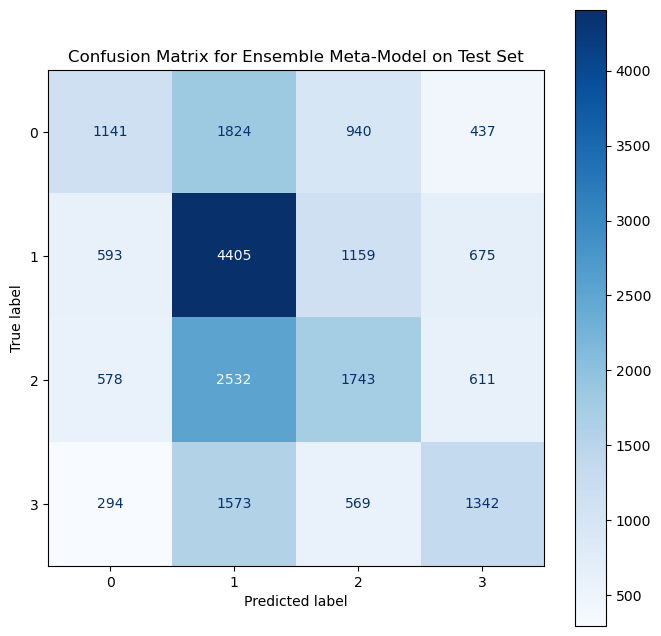

Test Set Class-wise Metrics:
rush_morning - Precision: 0.44, Recall: 0.26, F1-Score: 0.33
rush_evening - Precision: 0.43, Recall: 0.64, F1-Score: 0.51
non_rush_day - Precision: 0.40, Recall: 0.32, F1-Score: 0.35
non_rush_night - Precision: 0.44, Recall: 0.36, F1-Score: 0.39

Test Set Macro Averages:
Precision: 0.42, Recall: 0.40, F1-Score: 0.40

Test Set Micro Averages:
Precision: 0.42, Recall: 0.42, F1-Score: 0.42


In [44]:
y_test_pred = meta_model.predict(ensemble_test_features)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.unique(y_test))
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Ensemble Meta-Model on Test Set')
plt.show()

# Class-wise precision, recall, and F1-score
precision_test, recall_test, f1_score_test, _ = precision_recall_fscore_support(y_test, y_test_pred, average=None)

print("Test Set Class-wise Metrics:")
for i, class_name in enumerate(class_names):
    print(f"{class_name} - Precision: {precision_test[i]:.2f}, Recall: {recall_test[i]:.2f}, F1-Score: {f1_score_test[i]:.2f}")

# Macro and Micro Averages
precision_macro_test, recall_macro_test, f1_score_macro_test, _ = precision_recall_fscore_support(y_test, y_test_pred, average='macro')
precision_micro_test, recall_micro_test, f1_score_micro_test, _ = precision_recall_fscore_support(y_test, y_test_pred, average='micro')

print("\nTest Set Macro Averages:")
print(f"Precision: {precision_macro_test:.2f}, Recall: {recall_macro_test:.2f}, F1-Score: {f1_score_macro_test:.2f}")

print("\nTest Set Micro Averages:")
print(f"Precision: {precision_micro_test:.2f}, Recall: {recall_micro_test:.2f}, F1-Score: {f1_score_micro_test:.2f}")